# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.12.0-phi.new.339.357.359.362.366.367.382.383.389.408.fix.360.373.406'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See', 'Timor-Leste', 'Solomon Islands'],
 3: ['Laos', 'Tanzania', 'Saint Kitts and Nevis'],
 4: ['Brunei', 'Saint Lucia', 'Grenada', 'Dominica'],
 5: ['Equatorial Guinea', 'Fiji'],
 6: ['Saint Vincent and the Grenadines', 'Mauritius', 'Antigua and Barbuda'],
 7: ['Gambia'],
 8: ['Monaco', 'Lesotho', 'Northern Mariana Islands', 'Vietnam', 'Madagascar',
     'Kyrgyzstan', 'Liechtenstein', 'Seychelles', 'Cambodia', 'Bahamas',
     'Trinidad and Tobago'],
 9: ['Burundi', 'Swaziland', 'Barbados', 'Zambia', 'Virgin Islands, U.S.',
     'Republic of the Congo', 'Bermuda', 'Oman', 'Namibia', 'Jamaica',
     'Australia', 'Belize', 'Djibouti', 'Uzbekistan', 'Papua New Guinea',
     'Suriname', 'Sao Tome and Principe', 'Zimbabwe', 'Ghana', 'South Africa',
     'Bolivia', 'Malawi', 'Kazakhstan'],
 10: ['Bahrain', 'New Zealand', 'Syria', 'Egypt', 'Nigeria', 'Kuwait', 'Kenya',
      'Benin', 'Algeria', 'Central African Republic', 'Dominican Republic',
      'Guyana', 'Angola', 'Rwanda', '

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

6

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['France', 'United Kingdom', 'Belgium', 'Canada', 'Netherlands',
      'Portugal']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country  Phase                                        
France   0th    Past  07Feb2020  30Mar2020    66977107
         1st    Past  31Mar2020  22Apr2020    66977107
         2nd    Past  23Apr2020  08Jul2020    66977107
         3rd    Past  09Jul2020  18Aug2020    66977107
         4th    Past  19Aug2020  02Sep2020    66977107
...              ...        ...        ...         ...
Portugal 11th   Past  28Oct2020  02Nov2020    10283822
         12th   Past  03Nov2020  12Nov2020    10283822
         13th   Past  13Nov2020  22Nov2020    10283822
         14th   Past  23Nov2020  03Dec2020    10283822
         15th   Past  04Dec2020  12Dec2020    10283822

[96 rows x 4 columns]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR,  0th phase (18Feb2020 - 06Apr2020): finished  321 trials in 0 min 10 sec

	NLD,  2nd phase (17Apr2020 - 22May2020): finished  324 trials in 0 min 10 sec

	FRA,  6th phase (15Sep2020 - 22Sep2020): finished  341 trials in 0 min 10 sec

	NLD,  3rd phase (23May2020 - 07Aug2020): finished  320 trials in 0 min 10 sec

	NLD,  1st phase (01Apr2020 - 16Apr2020): finished  363 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 01Apr2020): finished  355 trials in 0 min 10 sec

	NLD,  8th phase (05Oct2020 - 14Oct2020): finished  362 trials in 0 min 10 sec

	NLD, 11th phase (04Nov2020 - 13Nov2020): finished  365 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR,  4th phase (12Jun2020 - 16Aug2020): finished  346 trials in 0 min 10 sec

	CAN,  7th phase (20Sep2020 - 04Oct2020): finished  361 trials in 0 min 10 sec

	FRA, 13th phase (11Nov2020 - 23Nov2020): finished  360 trials in 0 min 10 sec

	BEL, 10th phase (23Oct2020 - 01Nov2020): finished  365 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR, 15th phase (04Dec2020 - 12Dec2020): finished  366 trials in 0 min 10 sec

	BEL,  6th phase (15Sep2020 - 28Sep2020): finished  362 trials in 0 min 10 sec

	GBR,  8th phase (12Oct2020 - 19Oct2020): finished  365 trials in 0 min 10 sec

	FRA, 15th phase (03Dec2020 - 12Dec2020): finished  365 trials in 0 min 10 sec

	CAN,  0th phase (02Mar2020 - 07Apr2020): finished  355 trials in 0 min 10 sec

	PRT,  7th phase (16Sep2020 - 01Oct2020): finished  360 trials in 0 min 10 sec

	BEL,  2nd phase (14Apr2020 - 07May2020): finished  356 trials in 0 min 10 sec

	GBR, 14th phase (25Nov2020 - 03Dec2020): finished  366 trials in 0 min 10 sec

	BEL,  0th phase (13Mar2020 - 30Mar2020): finished  362 trials in 0 min 10 sec

	CAN, 13th phase (22Nov2020 - 28Nov2020): finished  365 trials in 0 min 10 sec

	CAN,  9th phase (18Oct2020 - 28Oct2020): finished  362 trials in 0 min 10 sec

	GBR, 13th phase (18Nov2020 - 24Nov2020): finished  365 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	BEL, 11th phase (02Nov2020 - 07Nov2020): finished  350 trials in 0 min 10 sec

	PRT,  6th phase (26Aug2020 - 15Sep2020): finished  341 trials in 0 min 10 sec

	CAN, 10th phase (29Oct2020 - 06Nov2020): finished  347 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA, 12th phase (01Nov2020 - 10Nov2020): finished  346 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	BEL,  5th phase (23Aug2020 - 14Sep2020): finished  358 trials in 0 min 10 sec

	FRA,  4th phase (19Aug2020 - 02Sep2020): finished  358 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	CAN,  5th phase (14Jul2020 - 22Aug2020): finished  350 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  0th phase (07Feb2020 - 30Mar2020): finished  347 trials in 0 min 10 sec

	FRA, 14th phase (24Nov2020 - 02Dec2020): finished  363 trials in 0 min 10 sec

	FRA,  9th phase (09Oct2020 - 15Oct2020): finished  363 trials in 0 min 10 sec

	PRT,  3rd phase (21May2020 - 18Jun2020): finished  347 trials in 0 min 10 sec

	NLD,  6th phase (19Sep2020 - 27Sep2020): finished  361 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD, 10th phase (25Oct2020 - 03Nov2020): finished  361 trials in 0 min 10 sec

	PRT, 10th phase (22Oct2020 - 27Oct2020): finished  361 trials in 0 min 10 sec

	BEL, 15th phase (02Dec2020 - 12Dec2020): finished  360 trials in 0 min 10 sec

	FRA,  5th phase (03Sep2020 - 14Sep2020): finished  362 trials in 0 min 10 sec

	BEL,  9th phase (13Oct2020 - 22Oct2020): finished  365 trials in 0 min 10 sec

	CAN, 11th phase (07Nov2020 - 14Nov2020): finished  363 trials in 0 min 10 sec

	GBR, 12th phase (12Nov2020 - 17Nov2020): finished  364 trials in 0 min 10 sec

	PRT, 12th phase (03Nov2020 - 12Nov2020): finished  363 trials in 0 min 10 sec

	CAN,  6th phase (23Aug2020 - 19Sep2020): finished  337 trials in 0 min 10 sec

	PRT, 13th phase (13Nov2020 - 22Nov2020): finished  341 trials in 0 min 10 sec

	CAN,  2nd phase (22Apr2020 - 06May2020): finished  341 trials in 0 min 10 sec

	CAN, 12th phase (15Nov2020 - 21Nov2020): finished  336 trials in 0 min 10 sec

	GBR,  1st phase (07Apr2020 - 23Apr2020): finished  359 trials in 0 min 10 sec

	BEL,  8th phase (07Oct2020 - 12Oct2020): finished  360 trials in 0 min 10 sec

	NLD, 14th phase (26Nov2020 - 01Dec2020): finished  361 trials in 0 min 10 sec

	CAN,  8th phase (05Oct2020 - 17Oct2020): finished  358 trials in 0 min 10 sec

	PRT, 11th phase (28Oct2020 - 02Nov2020): finished  366 trials in 0 min 10 sec

	BEL,  3rd phase (08May2020 - 27Jul2020): finished  337 trials in 0 min 10 sec

	PRT, 14th phase (23Nov2020 - 03Dec2020): finished  360 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD, 12th phase (14Nov2020 - 19Nov2020): finished  365 trials in 0 min 10 sec

	CAN,  3rd phase (07May2020 - 27May2020): finished  359 trials in 0 min 10 sec

	FRA,  8th phase (02Oct2020 - 08Oct2020): finished  364 trials in 0 min 10 sec

	FRA,  3rd phase (09Jul2020 - 18Aug2020): finished  351 trials in 0 min 10 sec

	PRT,  8th phase (02Oct2020 - 13Oct2020): finished  362 trials in 0 min 10 sec

	CAN,  4th phase (28May2020 - 13Jul2020): finished  350 trials in 0 min 10 sec

	CAN, 14th phase (29Nov2020 - 05Dec2020): finished  364 trials in 0 min 10 sec

	CAN,  1st phase (08Apr2020 - 21Apr2020): finished  359 trials in 0 min 10 sec

	GBR, 11th phase (06Nov2020 - 11Nov2020): finished  365 trials in 0 min 10 sec

	GBR,  5th phase (17Aug2020 - 17Sep2020): finished  356 trials in 0 min 10 sec

	GBR,  7th phase (03Oct2020 - 11Oct2020): finished  363 trials in 0 min 10 sec

	NLD,  5th phase (05Sep2020 - 18Sep2020): finished  360 trials in 0 min 10 sec

	BEL, 14th phase (23Nov2020 - 01Dec2020): finished  362 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	BEL,  1st phase (31Mar2020 - 13Apr2020): finished  361 trials in 0 min 10 sec

	CAN, 15th phase (06Dec2020 - 12Dec2020): finished  361 trials in 0 min 10 sec

	PRT,  5th phase (15Jul2020 - 25Aug2020): finished  347 trials in 0 min 10 sec

	FRA,  1st phase (31Mar2020 - 22Apr2020): finished  348 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	BEL,  4th phase (28Jul2020 - 22Aug2020): finished  356 trials in 0 min 10 sec

	FRA, 11th phase (22Oct2020 - 31Oct2020): finished  360 trials in 0 min 10 sec

	GBR,  2nd phase (24Apr2020 - 11May2020): finished  359 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD,  9th phase (15Oct2020 - 24Oct2020): finished  362 trials in 0 min 10 sec

	GBR, 10th phase (26Oct2020 - 05Nov2020): finished  362 trials in 0 min 10 sec

	FRA, 10th phase (16Oct2020 - 21Oct2020): finished  364 trials in 0 min 10 sec

	NLD,  7th phase (28Sep2020 - 04Oct2020): finished  365 trials in 0 min 10 sec

	PRT,  4th phase (19Jun2020 - 14Jul2020): finished  357 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	BEL, 12th phase (08Nov2020 - 14Nov2020): finished  364 trials in 0 min 10 sec

	PRT,  2nd phase (19Apr2020 - 20May2020): finished  353 trials in 0 min 10 sec

	GBR,  9th phase (20Oct2020 - 25Oct2020): finished  366 trials in 0 min 10 sec

	FRA,  2nd phase (23Apr2020 - 08Jul2020): finished  341 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	PRT,  9th phase (14Oct2020 - 21Oct2020): finished  364 trials in 0 min 10 sec

	BEL,  7th phase (29Sep2020 - 06Oct2020): finished  363 trials in 0 min 10 sec

	FRA,  7th phase (23Sep2020 - 01Oct2020): finished  365 trials in 0 min 10 sec

	NLD, 13th phase (20Nov2020 - 25Nov2020): finished  365 trials in 0 min 10 sec

	BEL, 13th phase (15Nov2020 - 22Nov2020): finished  370 trials in 0 min 10 sec

	PRT,  1st phase (02Apr2020 - 18Apr2020): finished  362 trials in 0 min 10 sec

	GBR,  6th phase (18Sep2020 - 02Oct2020): finished  361 trials in 0 min 10 sec

	NLD,  0th phase (11Mar2020 - 31Mar2020): finished  356 trials in 0 min 10 sec

	GBR,  3rd phase (12May2020 - 11Jun2020): finished  357 trials in 0 min 10 sec

	NLD,  4th phase (08Aug2020 - 04Sep2020): finished  365 trials in 0 min 10 sec

Completed optimization. Total: 4 min 18 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country  Phase                                                        
France   0th    Past  07Feb2020  30Mar2020    66977107  SIR-F  9.73   
         1st    Past  31Mar2020  22Apr2020    66977107  SIR-F  0.71   
         2nd    Past  23Apr2020  08Jul2020    66977107  SIR-F  0.59   
         3rd    Past  09Jul2020  18Aug2020    66977107  SIR-F  1.46   
         4th    Past  19Aug2020  02Sep2020    66977107  SIR-F  2.04   
...              ...        ...        ...         ...    ...   ...   
Portugal 11th   Past  28Oct2020  02Nov2020    10283822  SIR-F  2.18   
         12th   Past  03Nov2020  12Nov2020    10283822  SIR-F  1.89   
         13th   Past  13Nov2020  22Nov2020    10283822  SIR-F  1.13   
         14th   Past  23Nov2020  03Dec2020    10283822  SIR-F  0.85   
         15th   Past  04Dec2020  12Dec2020    10283822      -     -   

                      theta        kappa        rho       sigma  tau  \
Country  Phase                                                         
France   0th     0.00049108   9.6334e-05   0.040774  0.00409148  360   
         1st       0.346351   0.00147334  0.0243427   0.0210554  360   
         2nd       0.537173  8.03382e-05  0.0169514   0.0132485  360   
         3rd    0.000136135  0.000169658  0.0244773   0.0166129  360   
         4th     0.00128891  7.11256e-05  0.0306503   0.0149302  360   
...                     ...          ...        ...         ...  ...   
Portugal 11th    0.00013075  0.000168203  0.0171683  0.00770542  360   
         12th    0.00129257  0.000191072  0.0191448  0.00991507  360   
         13th   8.16456e-05  0.000231061  0.0182706   0.0159443  360   
         14th     0.0180656  1.42242e-05  0.0127852    0.014771  360   
         15th             -            -          -           -    -   

               1/beta [day] alpha1 [-] 1/alpha2 [day] 1/gamma [day]  \
Country  Phase                                                        
France   0th              6          0           2595            61   
         1st             10      0.346            169            11   
         2nd             14      0.537           3111            18   
         3rd             10          0           1473            15   
         4th              8      0.001           3514            16   
...                     ...        ...            ...           ...   
Portugal 11th            14          0           1486            32   
         12th            13      0.001           1308            25   
         13th            13          0           1081            15   
         14th            19      0.018          17575            16   
         15th             -          -              -             -   

                     RMSLE Trials       Runtime  
Country  Phase                                   
France   0th       1.30249    347  0 min 10 sec  
         1st      0.187872    348  0 min 10 sec  
         2nd      0.340536    341  0 min 10 sec  
         3rd     0.0965198    351  0 min 10 sec  
         4th     0.0319334    358  0 min 10 sec  
...                    ...    ...           ...  
Portugal 11th   0.00977216    366  0 min 10 sec  
         12th    0.0243799    363  0 min 10 sec  
         13th    0.0481644    341  0 min 10 sec  
         14th    0.0162982    360  0 min 10 sec  
         15th            -      -             -  

[96 rows x 18 columns]

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-07,France,0.00049108,9.6334e-05,0.040774,0.00409148,0,2595,6,61,...,0,0,0,0,0,1,2,2,1,11.11
1,2020-02-07,France,0.00049108,9.6334e-05,0.040774,0.00409148,0,2595,6,61,...,0,0,0,0,0,0,0,0,0,0.00
2,2020-02-07,France,0.00049108,9.6334e-05,0.040774,0.00409148,0,2595,6,61,...,0,0,0,0,0,1,0,0,0,11.11
3,2020-02-07,France,0.00049108,9.6334e-05,0.040774,0.00409148,0,2595,6,61,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-02-07,France,0.00049108,9.6334e-05,0.040774,0.00409148,0,2595,6,61,...,0,0,0,0,0,0,0,0,0,0.00


### $Rt$: Reprodcution number $\mathrm{[-]}$

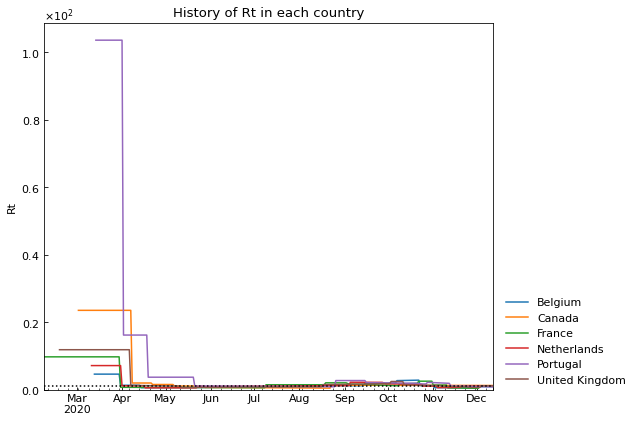

Country,Belgium,Canada,France,Netherlands,Portugal,United Kingdom
Date,,,,,,
2020-12-08,0.91,1.25,1.03,1.06,0.85,1.13
2020-12-09,0.91,1.25,1.03,1.06,0.85,1.13
2020-12-10,0.91,1.25,1.03,1.06,0.85,1.13
2020-12-11,0.91,1.25,1.03,1.06,0.85,1.13
2020-12-12,0.91,1.25,1.03,1.06,0.85,1.13


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

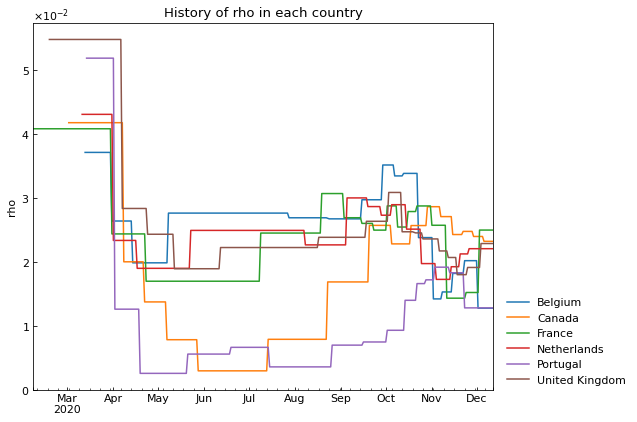

Country,Belgium,Canada,France,Netherlands,Portugal,United Kingdom
Date,,,,,,
2020-12-08,0.012735,0.023183,0.024945,0.022033,0.012785,0.022841
2020-12-09,0.012735,0.023183,0.024945,0.022033,0.012785,0.022841
2020-12-10,0.012735,0.023183,0.024945,0.022033,0.012785,0.022841
2020-12-11,0.012735,0.023183,0.024945,0.022033,0.012785,0.022841
2020-12-12,0.012735,0.023183,0.024945,0.022033,0.012785,0.022841


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

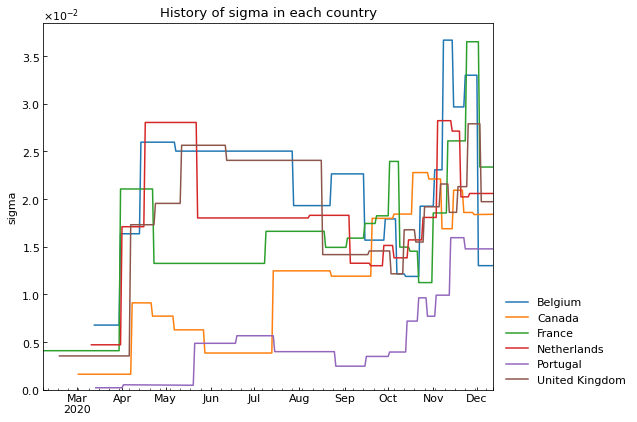

Country,Belgium,Canada,France,Netherlands,Portugal,United Kingdom
Date,,,,,,
2020-12-08,0.013012,0.018397,0.023356,0.020582,0.014771,0.019722
2020-12-09,0.013012,0.018397,0.023356,0.020582,0.014771,0.019722
2020-12-10,0.013012,0.018397,0.023356,0.020582,0.014771,0.019722
2020-12-11,0.013012,0.018397,0.023356,0.020582,0.014771,0.019722
2020-12-12,0.013012,0.018397,0.023356,0.020582,0.014771,0.019722


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

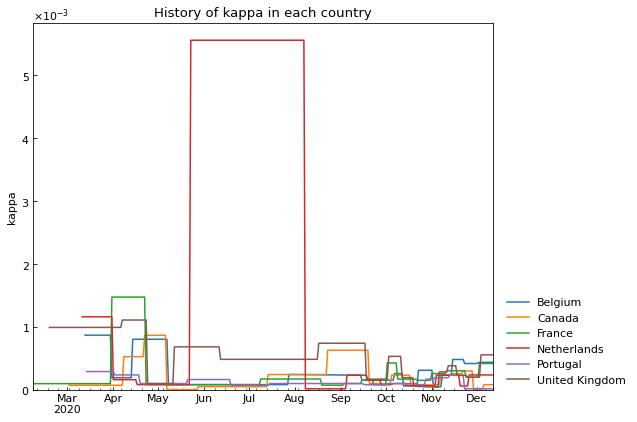

Country,Belgium,Canada,France,Netherlands,Portugal,United Kingdom
Date,,,,,,
2020-12-08,0.000435,0.000079,0.000417,0.000235,0.000014,0.000554
2020-12-09,0.000435,0.000079,0.000417,0.000235,0.000014,0.000554
2020-12-10,0.000435,0.000079,0.000417,0.000235,0.000014,0.000554
2020-12-11,0.000435,0.000079,0.000417,0.000235,0.000014,0.000554
2020-12-12,0.000435,0.000079,0.000417,0.000235,0.000014,0.000554


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

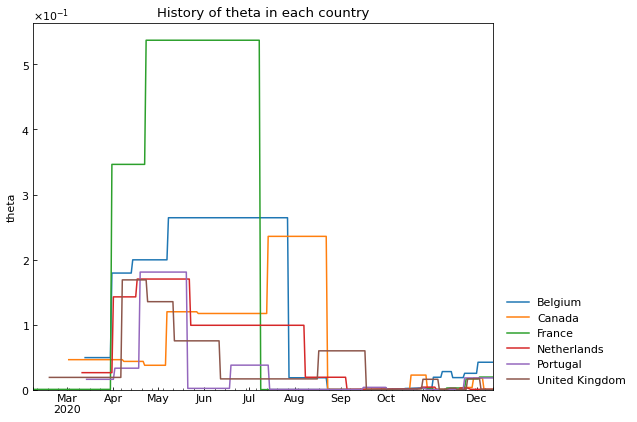

Country,Belgium,Canada,France,Netherlands,Portugal,United Kingdom
Date,,,,,,
2020-12-08,0.042212,0.00038,0.019439,0.000572,0.018066,0.000597
2020-12-09,0.042212,0.00038,0.019439,0.000572,0.018066,0.000597
2020-12-10,0.042212,0.00038,0.019439,0.000572,0.018066,0.000597
2020-12-11,0.042212,0.00038,0.019439,0.000572,0.018066,0.000597
2020-12-12,0.042212,0.00038,0.019439,0.000572,0.018066,0.000597


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25739 entries, 0 to 25808
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 25739 non-null  datetime64[ns]
 1   Country                              25739 non-null  object        
 2   Rt                                   25739 non-null  float64       
 3   theta                                25739 non-null  float64       
 4   kappa                                25739 non-null  float64       
 5   rho                                  25739 non-null  float64       
 6   sigma                                25739 non-null  float64       
 7   School_closing                       25739 non-null  int64         
 8   Workplace_closing                    25739 non-null  int64         
 9   Cancel_events                        25739 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.132862,-0.036979,0.487159,-0.413472,-0.087207,-0.171203,-0.176424,-0.320134,-0.177978,-0.133702,-0.213893,-0.161079,-0.190303,-0.194983,-0.180315,-0.195241
theta,-0.132862,1.000000,0.012516,-0.263456,0.009967,0.260896,0.227770,0.185134,0.157063,0.111777,0.218273,0.227042,0.162360,0.099333,-0.211347,-0.019803,0.315382
kappa,-0.036979,0.012516,1.000000,0.127598,0.092402,-0.067078,0.029483,0.128476,-0.169600,0.092057,-0.060043,-0.044344,-0.040380,0.062970,-0.131985,0.094199,-0.097954
rho,0.487159,-0.263456,0.127598,1.000000,-0.209941,-0.357202,-0.407383,-0.167901,-0.478446,-0.194924,-0.291483,-0.077475,-0.569691,-0.303738,-0.531034,-0.138359,-0.466896
sigma,-0.413472,0.009967,0.092402,-0.209941,1.000000,0.171178,0.287508,0.381341,0.467533,0.338371,0.246777,0.416400,0.068527,0.272218,0.001206,0.357245,0.295562
School_closing,-0.087207,0.260896,-0.067078,-0.357202,0.171178,1.000000,0.694419,0.093039,0.426028,0.050903,0.499527,0.144677,0.220664,0.351172,0.067185,-0.088434,0.751670
Workplace_closing,-0.171203,0.227770,0.029483,-0.407383,0.287508,0.694419,1.000000,0.438969,0.579074,0.281515,0.717641,0.315028,0.295955,0.455262,-0.024926,-0.158003,0.847844
Cancel_events,-0.176424,0.185134,0.128476,-0.167901,0.381341,0.093039,0.438969,1.000000,0.547981,0.732529,0.491465,0.707666,-0.038932,0.345869,-0.211058,-0.031309,0.518852
Gatherings_restrictions,-0.320134,0.157063,-0.169600,-0.478446,0.467533,0.426028,0.579074,0.547981,1.000000,0.568360,0.563015,0.654011,0.397646,0.572775,0.295447,0.240105,0.739707
Transport_closing,-0.177978,0.111777,0.092057,-0.194924,0.338371,0.050903,0.281515,0.732529,0.568360,1.000000,0.374093,0.684281,-0.025652,0.295753,-0.086370,0.026676,0.403188


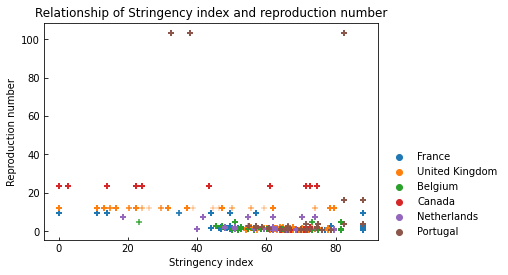

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()